In [81]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc, avg, min, max, col

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# pyspark     3.5.3
# pandas      2.2.3
# seaborn     0.13.2
# matplotlib  3.9.3
# squarify    0.4.4

In [22]:
spark = SparkSession.builder \
    .appName("Mountain-Beach Dataset EDA") \
    .getOrCreate()

In [23]:
data_path = "data/mountains_vs_beaches_preferences.csv"

df = spark.read.csv(data_path,
                    sep=';',
                    inferSchema=True,
                    header=True)

In [24]:
for field in df.schema:
    print(f"{field}")

StructField('Age', IntegerType(), True)
StructField('Gender', StringType(), True)
StructField('Income', IntegerType(), True)
StructField('Education_Level', StringType(), True)
StructField('Travel_Frequency', IntegerType(), True)
StructField('Preferred_Activities', StringType(), True)
StructField('Vacation_Budget', IntegerType(), True)
StructField('Location', StringType(), True)
StructField('Proximity_to_Mountains', IntegerType(), True)
StructField('Proximity_to_Beaches', IntegerType(), True)
StructField('Favorite_Season', StringType(), True)
StructField('Pets', IntegerType(), True)
StructField('Environmental_Concerns', IntegerType(), True)
StructField('Preference', IntegerType(), True)


In [25]:
df.describe()

DataFrame[summary: string, Age: string, Gender: string, Income: string, Education_Level: string, Travel_Frequency: string, Preferred_Activities: string, Vacation_Budget: string, Location: string, Proximity_to_Mountains: string, Proximity_to_Beaches: string, Favorite_Season: string, Pets: string, Environmental_Concerns: string, Preference: string]

In [26]:
# df.select([col[0] for col in df.dtypes if col[1] != 'string']).describe().show()

## Preferencja

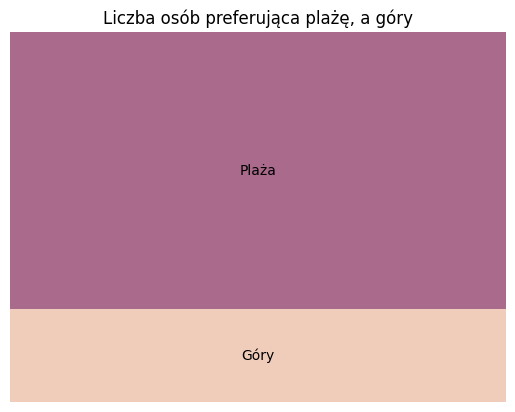

In [27]:
preference = df.groupBy('Preference').count().toPandas()
preference["Preference"] = preference["Preference"].replace({0: "Plaża", 1: "Góry"})

colors = ['#eab99e', '#862b5b']

squarify.plot(sizes = preference['count'], label = preference['Preference'], color = colors, alpha = 0.7)
plt.title('Liczba osób preferująca plażę, a góry')
plt.axis("off")
plt.show()

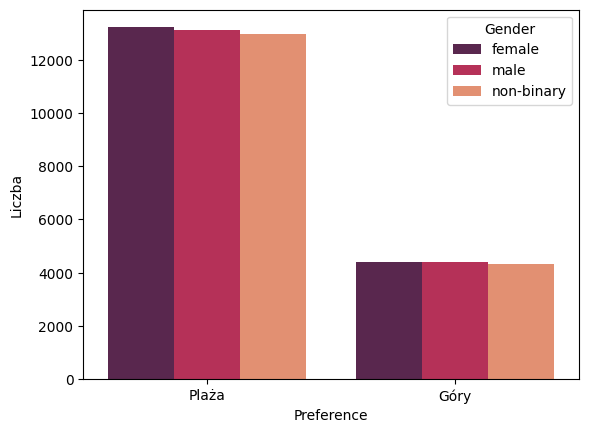

In [84]:
pref_gen = df.groupBy('Preference', 'Gender').count().toPandas()
pref_gen['Preference'] = pref_gen['Preference'].replace({0: "Plaża", 1: "Góry"})

sns.barplot(x='Preference', y='count', data=pref_gen, palette="rocket", hue='Gender')
plt.ylabel("Liczba")
plt.show()

In [38]:
pref_income = df.groupBy('Preference').agg(
    avg('Income').alias('avg_income'),
    min('Income').alias('min_income'),
    max('Income').alias('max_income')
).toPandas()
pref_income["Preference"] = pref_income["Preference"].replace({0: "Plaża", 1: "Góry"})

print(pref_income)

  Preference    avg_income  min_income  max_income
0       Góry  69867.770307       20003      119995
1      Plaża  70067.292625       20001      119999


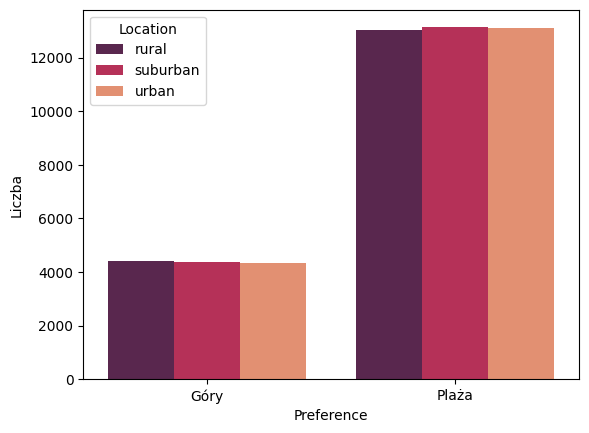

In [ ]:
pref_location = df.groupBy('Preference', 'Location').count().toPandas()
pref_location['Preference'] = pref_location['Preference'].replace({0: "Plaża", 1: "Góry"})

sns.barplot(x='Preference', y='count', data=pref_location, palette="rocket", hue='Location')
plt.ylabel("Liczba")
plt.show()

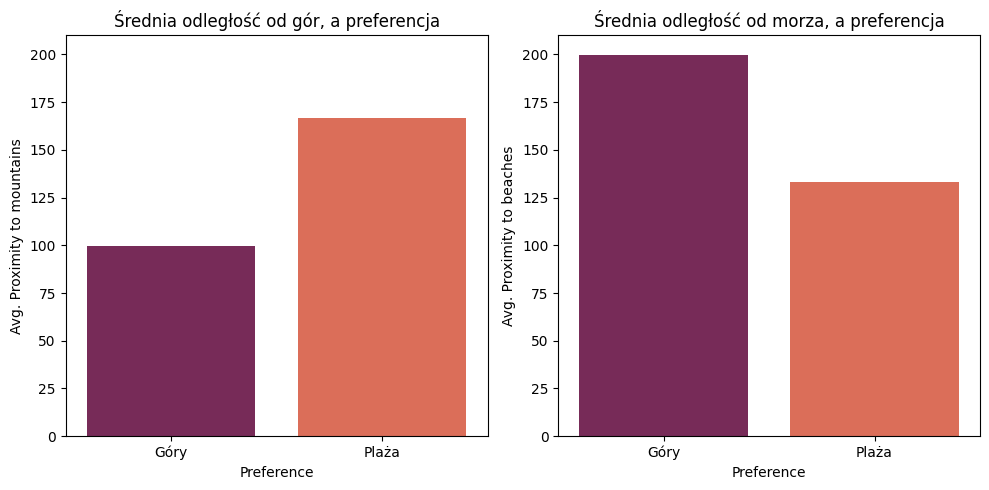

In [66]:
pref_prox_mountain = df.groupBy('Preference').avg('Proximity_to_Mountains').toPandas()
pref_prox_beach = df.groupBy('Preference').avg('Proximity_to_Beaches').toPandas()

pref_prox_mountain["Preference"] = pref_prox_mountain["Preference"].replace({0: "Plaża", 1: "Góry"})
pref_prox_beach["Preference"] = pref_prox_beach["Preference"].replace({0: "Plaża", 1: "Góry"})

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=pref_prox_mountain, y='avg(Proximity_to_Mountains)', x='Preference'
            , palette="rocket", hue="Preference")
plt.title('Średnia odległość od gór, a preferencja')
plt.ylabel('Avg. Proximity to mountains')
plt.ylim((0, 210))

plt.subplot(1, 2, 2)
sns.barplot(data=pref_prox_beach, y='avg(Proximity_to_Beaches)', x='Preference'
            , palette="rocket", hue="Preference")
plt.title('Średnia odległość od morza, a preferencja')
plt.ylabel('Avg. Proximity to beaches')
plt.ylim((0, 210))


plt.tight_layout()
plt.show()


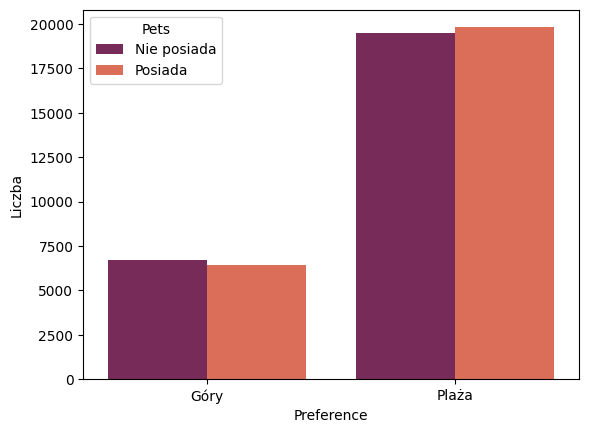

In [75]:
pref_pet = df.groupBy('Preference', 'Pets').count().toPandas()
pref_pet['Preference'] = pref_pet['Preference'].replace({0: "Plaża", 1: "Góry"})
pref_pet['Pets'] = pref_pet['Pets'].replace({0: "Nie posiada", 1: "Posiada"})

sns.barplot(x='Preference', y='count', data=pref_pet, palette="rocket", hue='Pets')
plt.ylabel("Liczba")
plt.show()

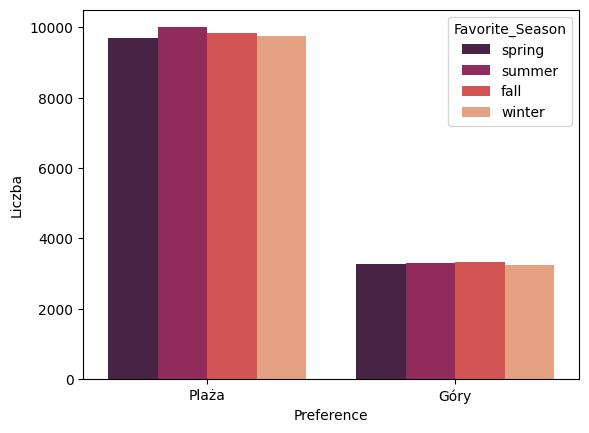

In [82]:
pref_fav_season = df.groupBy('Preference', 'Favorite_Season').count().toPandas()
pref_fav_season['Preference'] = pref_fav_season['Preference'].replace({0: "Plaża", 1: "Góry"})

season_order = ['spring', 'summer', 'fall', 'winter']
pref_fav_season['Favorite_Season'] = pd.Categorical(
    pref_fav_season['Favorite_Season'],
    categories=season_order,
    ordered=True
)

sns.barplot(x='Preference', y='count', data=pref_fav_season,
             palette="rocket", hue='Favorite_Season', hue_order=season_order)
plt.ylabel("Liczba")
plt.show()

## Wiek

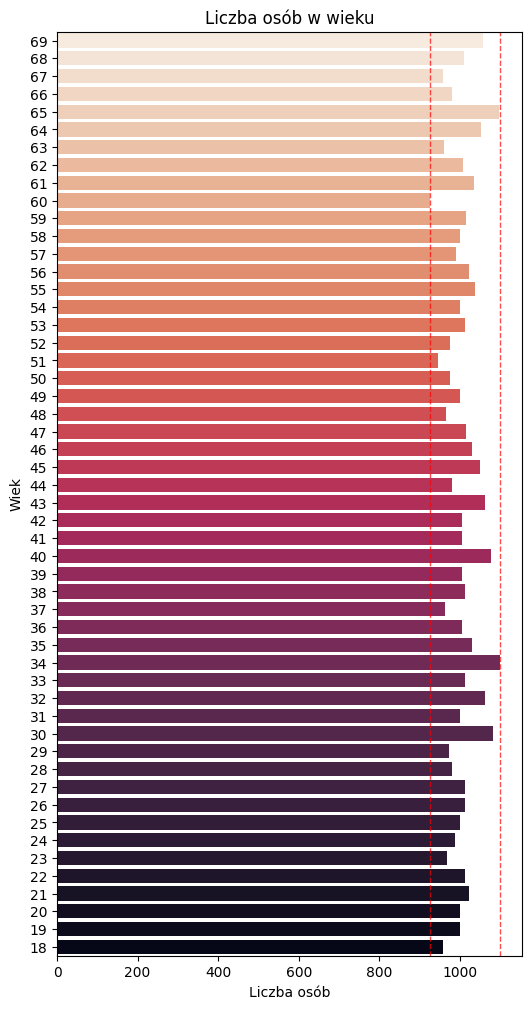

In [151]:
age = df.groupBy('Age').count().sort(desc('Age')).toPandas()

plt.figure(figsize=(6, 12))

plt.title('Liczba osób w wieku')
plt.ylabel('Wiek')
plt.xlabel('Liczba osób')

sns.barplot(y='Age', x='count', data=age, orient='h', order=age['Age'], palette="rocket", hue="Age", legend=False)
plt.axvline(x=age['count'].min(), color='red', linestyle='--', linewidth=1, alpha=0.7) 
plt.axvline(x=age['count'].max(), color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.show()

## Płeć

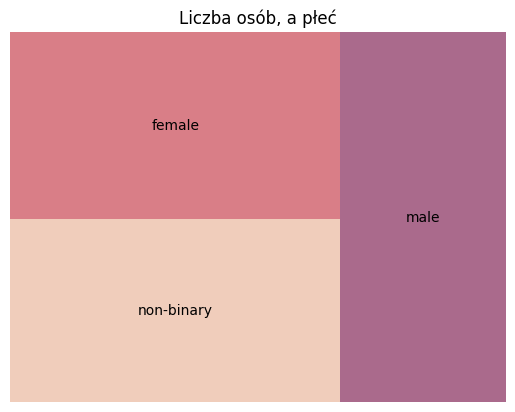

In [68]:
gender = df.groupBy('Gender').count().toPandas()

colors = ['#eab99e', '#ca4754', '#862b5b']
squarify.plot(sizes = gender['count'], label = gender['Gender'], color = colors, alpha = 0.7)
plt.title('Liczba osób, a płeć')
plt.axis("off")
plt.show()

## Zamieszkanie

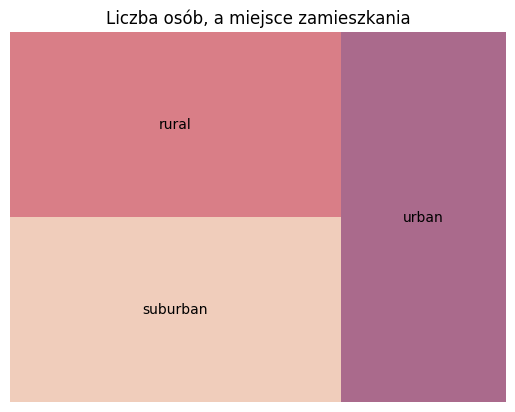

In [67]:
location = df.groupBy('Location').count().toPandas()

colors = ['#eab99e', '#ca4754', '#862b5b', '#702a56']
squarify.plot(sizes = location['count'], label = location['Location'], color = colors, alpha = 0.7)
plt.title('Liczba osób, a miejsce zamieszkania')
plt.axis("off")
plt.show()

## Wykształcenie

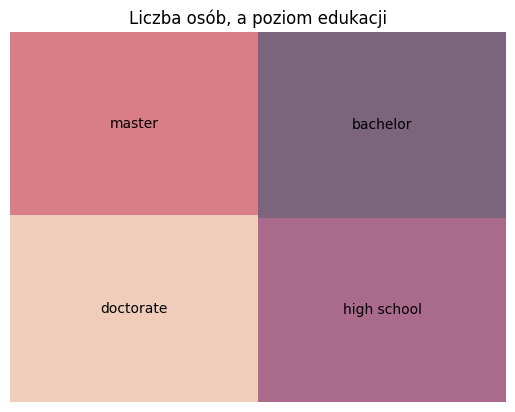

In [69]:
edu = df.groupBy('Education_Level').count().toPandas()

colors = ['#eab99e', '#ca4754', '#862b5b', '#452344']
squarify.plot(sizes = edu['count'], label = edu['Education_Level'], color = colors, alpha = 0.7)
plt.title('Liczba osób, a poziom edukacji')
plt.axis("off")
plt.show()

## Aktywność

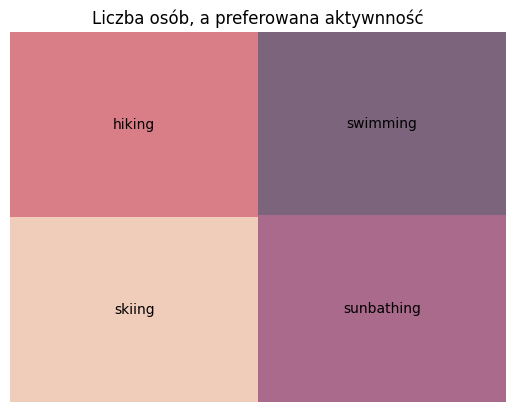

In [70]:
act = df.groupBy('Preferred_Activities').count().toPandas()

colors = ['#eab99e', '#ca4754', '#862b5b', '#452344']
squarify.plot(sizes = act['count'], label = act['Preferred_Activities'], color = colors, alpha = 0.7)
plt.title('Liczba osób, a preferowana aktywnność')
plt.axis("off")
plt.show()

## Pora roku

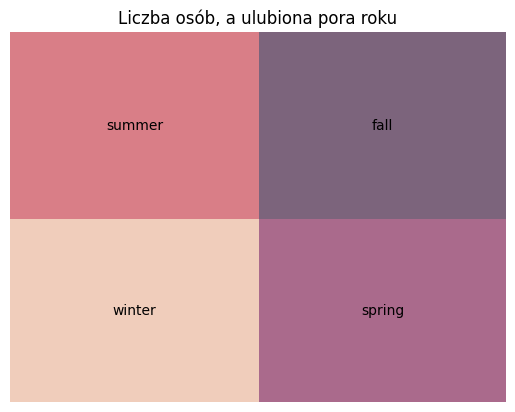

In [165]:
season = df.groupBy('Favorite_Season').count().toPandas()

colors = ['#eab99e', '#ca4754', '#862b5b', '#452344']
squarify.plot(sizes = season['count'], label = season['Favorite_Season'], color = colors, alpha = 0.7)
plt.title('Liczba osób, a ulubiona pora roku')
plt.axis("off")
plt.show()

## Zwierzęta

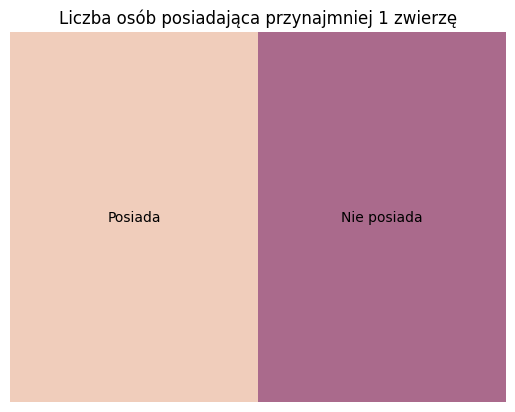

In [170]:
pet = df.groupBy('Pets').count().toPandas()
pet["Pets"] = pet["Pets"].replace({0: "Nie posiada", 1: "Posiada"})

colors = ['#eab99e', '#862b5b']

squarify.plot(sizes = pet['count'], label = pet['Pets'], color = colors, alpha = 0.7)
plt.title('Liczba osób posiadająca przynajmniej 1 zwierzę')
plt.axis("off")
plt.show()

## Bibliografia:
1. Dane: https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference